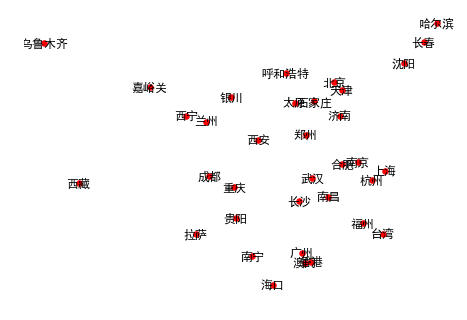

In [11]:
#####################Search Problem

coordination_source = """
{name:'兰州', geoCoord:[103.73, 36.03]},
{name:'嘉峪关', geoCoord:[98.17, 39.47]},
{name:'西宁', geoCoord:[101.74, 36.56]},
{name:'成都', geoCoord:[104.06, 30.67]},
{name:'石家庄', geoCoord:[114.48, 38.03]},
{name:'拉萨', geoCoord:[102.73, 25.04]},
{name:'贵阳', geoCoord:[106.71, 26.57]},
{name:'武汉', geoCoord:[114.31, 30.52]},
{name:'郑州', geoCoord:[113.65, 34.76]},
{name:'济南', geoCoord:[117, 36.65]},
{name:'南京', geoCoord:[118.78, 32.04]},
{name:'合肥', geoCoord:[117.27, 31.86]},
{name:'杭州', geoCoord:[120.19, 30.26]},
{name:'南昌', geoCoord:[115.89, 28.68]},
{name:'福州', geoCoord:[119.3, 26.08]},
{name:'广州', geoCoord:[113.23, 23.16]},
{name:'长沙', geoCoord:[113, 28.21]},
{name:'海口', geoCoord:[110.35, 20.02]},
{name:'沈阳', geoCoord:[123.38, 41.8]},
{name:'长春', geoCoord:[125.35, 43.88]},
{name:'哈尔滨', geoCoord:[126.63, 45.75]},
{name:'太原', geoCoord:[112.53, 37.87]},
{name:'西安', geoCoord:[108.95, 34.27]},
//{name:'台湾', geoCoord:[121.30, 25.03]},
{name:'北京', geoCoord:[116.46, 39.92]},
{name:'上海', geoCoord:[121.48, 31.22]},
{name:'重庆', geoCoord:[106.54, 29.59]},
{name:'天津', geoCoord:[117.2, 39.13]},
{name:'呼和浩特', geoCoord:[111.65, 40.82]},
{name:'南宁', geoCoord:[108.33, 22.84]},
//{name:'西藏', geoCoord:[91.11, 29.97]},
{name:'银川', geoCoord:[106.27, 38.47]},
{name:'乌鲁木齐', geoCoord:[87.68, 43.77]},
{name:'香港', geoCoord:[114.17, 22.28]},
{name:'澳门', geoCoord:[113.54, 22.19]}
"""

########################数据预处理
##字符串变成字典
import re
import math
from collections import defaultdict
import matplotlib

coordinatioon_dict={}
coordination_source_list = re.findall("name:'(\w+)', geoCoord:\[(\d+\.*\d+), (\d+\.*\d+)\]",coordination_source)
for l in coordination_source_list:
    city, long, lat = l
    coordinatioon_dict[city]=(float(long),float(lat))
coordinatioon_dict

##计算两个城市之间的距离
def geo_distance(origin, destination):
    """
    Calculate the Haversine distance.

    Parameters
    ----------
    origin : tuple of float
        (lat, long)
    destination : tuple of float
        (lat, long)

    Returns
    -------
    distance_in_km : float

    Examples
    --------
    >>> origin = (48.1372, 11.5756)  # Munich
    >>> destination = (52.5186, 13.4083)  # Berlin
    >>> round(distance(origin, destination), 1)
    504.2
    """
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

def get_geo_distance(city1, city2):
    return geo_distance(coordinatioon_dict[city1], coordinatioon_dict[city2])

get_geo_distance('上海', '杭州')


##绘制网络图
import networkx as nx
import matplotlib.pyplot as plt
matplotlib.rcParams['font.sans-serif'] = ['SimHei'] 
matplotlib.rcParams['font.family']='sans-serif'
city_graph = nx.Graph()
city_graph.add_nodes_from(list( coordinatioon_dict.keys()))
nx.draw(city_graph,coordinatioon_dict, with_labels=True, node_size=30)




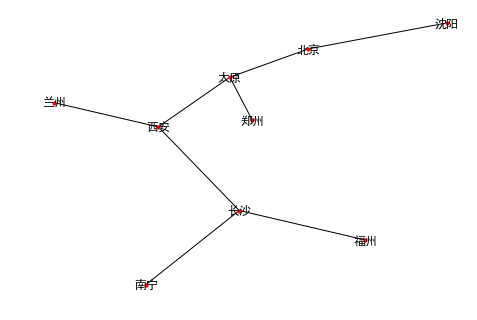

In [12]:
##
simple_connection_info_src = {
    '北京': ['太原', '沈阳'],
    '太原': ['北京', '西安', '郑州'],
    '兰州': ['西安'],
    '郑州': ['太原'],
    '西安': ['兰州', '长沙'],
    '长沙': ['福州', '南宁'],
    '沈阳': ['北京']
}

simple_connection_info = defaultdict(list)
simple_connection_info.update(simple_connection_info_src)
nx.draw(nx.Graph(simple_connection_info),coordinatioon_dict , with_labels=True, node_size=10)

In [36]:
#############定义搜索函数，基于广度优先遍历（Breath First Search)方法
def search(start, destination, connection_grpah):
    pathes = [[start]]##存储所有探索出来的路径，每个元素为一条路径，数据形式为列表。如[[兰州，西安，长沙，福州],[兰州，西安，太原]，[兰州，西安，太原，郑州]]
    
    visited = set()
    
    while pathes: # if we find existing pathes
        path = pathes.pop(0)#pop函数，移除列表pathes中的第0个元素，并且返回被删除的元素
        froninter = path[-1]
        
        if froninter in visited: continue
            
        successors = connection_grpah[froninter]
        
        for city in successors:
            if city in path: continue  # eliminate loop
                
            new_path = path + [city]
            
            pathes.append(new_path)
            
            if city == destination: return new_path
        visited.add(froninter)

        
search("兰州","福州",simple_connection_info)       

['兰州', '西安', '长沙', '福州']

In [40]:
###假设距离小于threshold的城市之间都能直达，创建网络图
threshold = 500
city_connection = defaultdict(list)
for c1 in coordinatioon_dict:
    for c2 in coordinatioon_dict:
        if c1 == c2: continue
        
        distance = get_geo_distance(c1, c2)
        
        if distance < threshold:
            city_connection[c1].append(c2)
            city_connection[c2].append(c1)

city_connection

defaultdict(list,
            {'兰州': ['西宁',
              '成都',
              '拉萨',
              '贵阳',
              '重庆',
              '银川',
              '西宁',
              '成都',
              '拉萨',
              '贵阳',
              '重庆',
              '银川'],
             '西宁': ['兰州', '嘉峪关', '兰州', '嘉峪关', '成都', '拉萨', '成都', '拉萨'],
             '成都': ['兰州',
              '西宁',
              '兰州',
              '西宁',
              '拉萨',
              '贵阳',
              '重庆',
              '银川',
              '拉萨',
              '贵阳',
              '重庆',
              '银川'],
             '拉萨': ['兰州',
              '西宁',
              '成都',
              '兰州',
              '西宁',
              '成都',
              '贵阳',
              '重庆',
              '贵阳',
              '重庆'],
             '贵阳': ['兰州',
              '成都',
              '拉萨',
              '兰州',
              '成都',
              '拉萨',
              '海口',
              '西安',
              '重庆',
              '南宁',
    

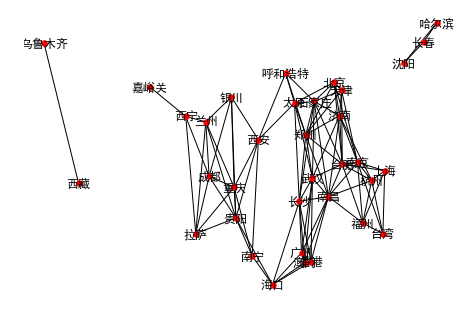

In [41]:
city_with_road = nx.Graph(city_connection)
nx.draw(city_with_road, coordinatioon_dict, with_labels=True, node_size=30)

In [42]:
search("兰州","福州",city_connection)

['兰州', '贵阳', '海口', '广州', '南昌', '福州']

In [53]:
###############可添加不同的搜索策略，比如换乘最少，距离最短
def search(start, destination, connection_grpah, sort_candidate):
    pathes = [[start]]
    
    visitied = set()
    
    while pathes: # if we find existing pathes
        path = pathes.pop(0)
        froninter = path[-1]
        
        if froninter in visitied: continue
            
        successors = connection_grpah[froninter]
        
        for city in successors:
            if city in path: continue  # eliminate loop
                
            new_path = path + [city]
            
            pathes.append(new_path)
            
            if city == destination: return new_path
        
        visitied.add(froninter)
        
        pathes = sort_candidate(pathes) # 我们可以加一个排序函数 对我们的搜索策略进行控制
        

def transfer_stations_first(pathes): 
    return sorted(pathes, key=len)

def transfer_as_much_possible(pathes):
    return sorted(pathes, key=len, reverse=True)

def shortest_path_first(pathes):
    
    if len(pathes) <= 1: return pathes
    
    def get_path_distnace(path):
        distance = 0
        for i in range(len(path[:-1])):
            distance += get_geo_distance(path[i], path[i+1])
            
        return distance

    return sorted(pathes, key=get_path_distnace)


def pretty_print(cities):
    print('🚗->'.join(cities))
    
pretty_print(search("兰州","福州",city_connection, sort_candidate=transfer_stations_first))#换乘最少


兰州🚗->贵阳🚗->海口🚗->广州🚗->南昌🚗->福州


In [49]:
pretty_print(search("兰州","福州",city_connection, sort_candidate=transfer_as_much_possible))#换乘最多

兰州🚗->西宁🚗->成都🚗->拉萨🚗->贵阳🚗->海口🚗->广州🚗->武汉🚗->石家庄🚗->郑州🚗->济南🚗->南京🚗->福州


In [54]:
pretty_print(search("兰州","福州",city_connection, sort_candidate=shortest_path_first))#最短路径

兰州🚗->银川🚗->西安🚗->太原🚗->郑州🚗->南昌🚗->福州


In [21]:
#######################【重要知识点：深度优先遍历和广度优先遍历】
def bfs(graph, start):
    """
    breath first search
    """
    visited = [start]
    
    seen = set()
    
    while visited:
        froninter = visited.pop() #
        
        if froninter in seen: continue
        
        for successor in graph[froninter]:
            if successor in seen: continue
            print(successor)
            
            #visited = visited + [successor] # 我们每次扩展都扩展最新发现的点 -> depth first
            visited = [successor] + visited # 我们每次扩展都先考虑已经发现的 老的点 -> breath first
            
            # 所以说，这个扩展顺序其实是决定了我们的深度优先还是广度优先
    
        seen.add(froninter)
    
    return seen

In [26]:
number_graph = defaultdict(list)
number_graph.update({
    1: [2, 3],
    2: [1, 4], 
    3: [1, 5],
    4: [2, 6], 
    5: [3, 7],
    7: [5, 8]
})
bfs(number_graph,1)

2
3
4
5
6
7
8


{1, 2, 3, 4, 5, 6, 7, 8}

In [27]:
def dfs(graph, start):
    """
    breath first search
    """
    visited = [start]
    
    seen = set()
    
    while visited:
        froninter = visited.pop() #
        
        if froninter in seen: continue
        
        for successor in graph[froninter]:
            if successor in seen: continue
            print(successor)
            
            visited = visited + [successor] # 我们每次扩展都扩展最新发现的点 -> depth first
            #visited = [successor] + visited # 我们每次扩展都先考虑已经发现的 老的点 -> breath first
            
            # 所以说，这个扩展顺序其实是决定了我们的深度优先还是广度优先
    
        seen.add(froninter)
    
    return seen

dfs(number_graph,1)

2
3
5
7
8
4
6


{1, 2, 3, 4, 5, 6, 7, 8}